In [34]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf

In [35]:
df = pd.read_csv('ToyotaCorolla.csv',encoding = 'latin1')
df

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [37]:
df.isna().sum()

Id                  0
Model               0
Price               0
Age_08_04           0
Mfg_Month           0
Mfg_Year            0
KM                  0
Fuel_Type           0
HP                  0
Met_Color           0
Color               0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
Quarterly_Tax       0
Weight              0
Mfr_Guarantee       0
BOVAG_Guarantee     0
Guarantee_Period    0
ABS                 0
Airbag_1            0
Airbag_2            0
Airco               0
Automatic_airco     0
Boardcomputer       0
CD_Player           0
Central_Lock        0
Powered_Windows     0
Power_Steering      0
Radio               0
Mistlamps           0
Sport_Model         0
Backseat_Divider    0
Metallic_Rim        0
Radio_cassette      0
Tow_Bar             0
dtype: int64

In [38]:
df= df.iloc[:,[2,3,6,8,12,13,15,16,17]]
df

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [39]:
df.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


In [100]:
model = smf.ols('Price ~ Age_08_04 + KM + HP + cc + Doors + Gears + Quarterly_Tax + Weight',data = df).fit()
model


In [101]:
model.params

Intercept       -5573.106358
Age_08_04        -121.658402
KM                 -0.020817
HP                 31.680906
cc                 -0.121100
Doors              -1.616641
Gears             594.319936
Quarterly_Tax       3.949081
Weight             16.958632
dtype: float64

In [102]:
print(model.pvalues)

Intercept         8.241949e-05
Age_08_04        3.354724e-288
KM                7.538439e-57
HP                3.757218e-28
cc                1.790902e-01
Doors             9.677716e-01
Gears             2.606549e-03
Quarterly_Tax     2.619148e-03
Weight            2.048576e-52
dtype: float64


In [43]:
#here "cc" and "doors" are considered as insignificant values

In [103]:
model.rsquared

0.8637627463428192

In [104]:
model.rsquared_adj

0.8629989775766963

# simple  linear regression models

In [45]:
new = smf.ols('Price ~ cc',data = df).fit()
new

In [46]:
new.pvalues

Intercept    1.766912e-112
cc            1.550808e-06
dtype: float64

In [47]:
new1 = smf.ols('Price ~ Doors',data = df).fit()
new1

In [48]:
new1.pvalues

Intercept    1.094732e-73
Doors        1.461237e-12
dtype: float64

In [49]:
#by observing these we can say that the "Doors" and "cc" are significant values

In [50]:
#But we can check again one more time with combining of these columns

In [51]:
newcom = smf.ols('Price ~ Doors +cc',data = df).fit()
newcom

In [52]:
newcom.pvalues

Intercept    1.056885e-34
Doors        1.373469e-11
cc           1.521992e-05
dtype: float64

In [53]:
#by combining both also we should say that the values are significant values

In [54]:
newcom.rsquared

0.0468758961304625

# Residual Analysis

# Q-Q plot

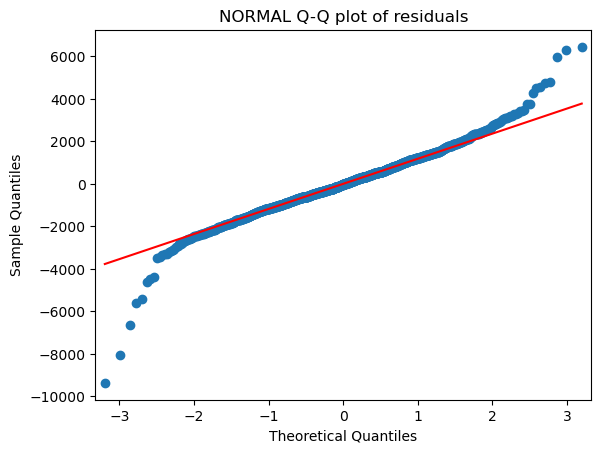

In [55]:
import  statsmodels.api as sm
qqplot = sm.qqplot(model.resid,line = 'q')
plt.title("NORMAL Q-Q plot of residuals")
plt.show()

In [56]:
list(np.where(model.resid<-4000))

[array([191, 192, 221, 393, 402, 601, 654, 960], dtype=int64)]

In [57]:
list(np.where(model.resid>4000))

[array([ 109,  110,  111,  125,  147,  171,  523, 1058], dtype=int64)]

# Residual homoscedasticity analysis

In [58]:
def get_std_val(value) :
    return (value-value.mean())/value.std()

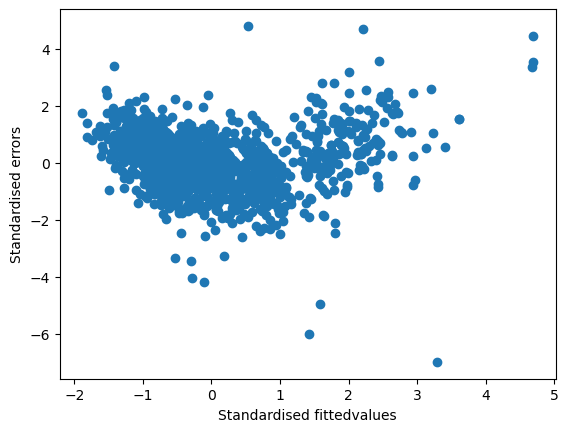

<Figure size 1500x700 with 0 Axes>

In [60]:
plt.scatter(get_std_val(model.fittedvalues),get_std_val(model.resid))
plt.xlabel('Standardised fittedvalues')
plt.ylabel('Standardised errors')
plt.figure(figsize=(15,7))
plt.show()

# Residuals vs Regressors analysis

eval_env: 1


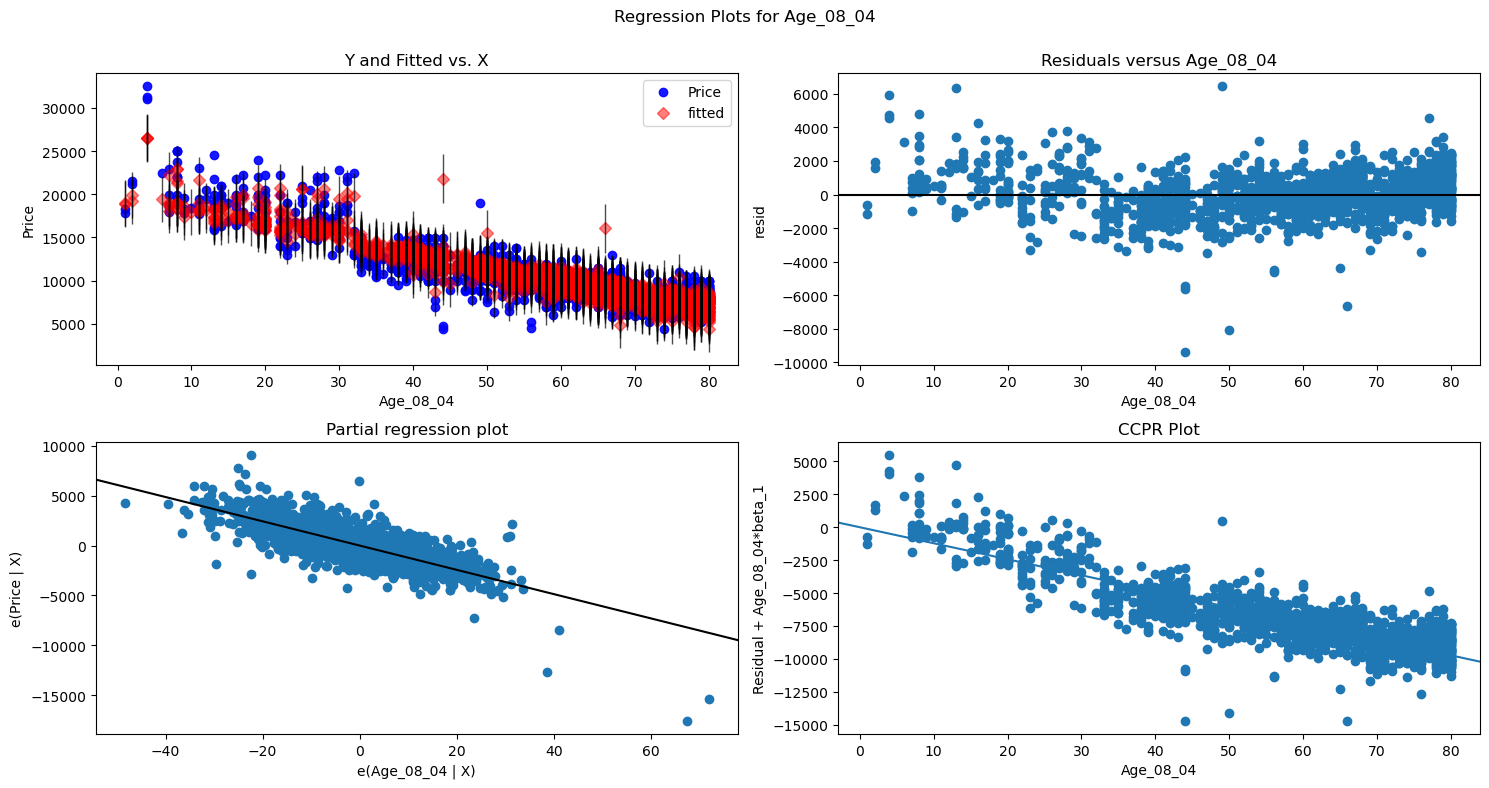

In [70]:
from statsmodels.api import graphics
fig = plt.figure(figsize = (15,8))
fig = graphics.plot_regress_exog(model,"Age_08_04",fig = fig)
plt.show()

eval_env: 1


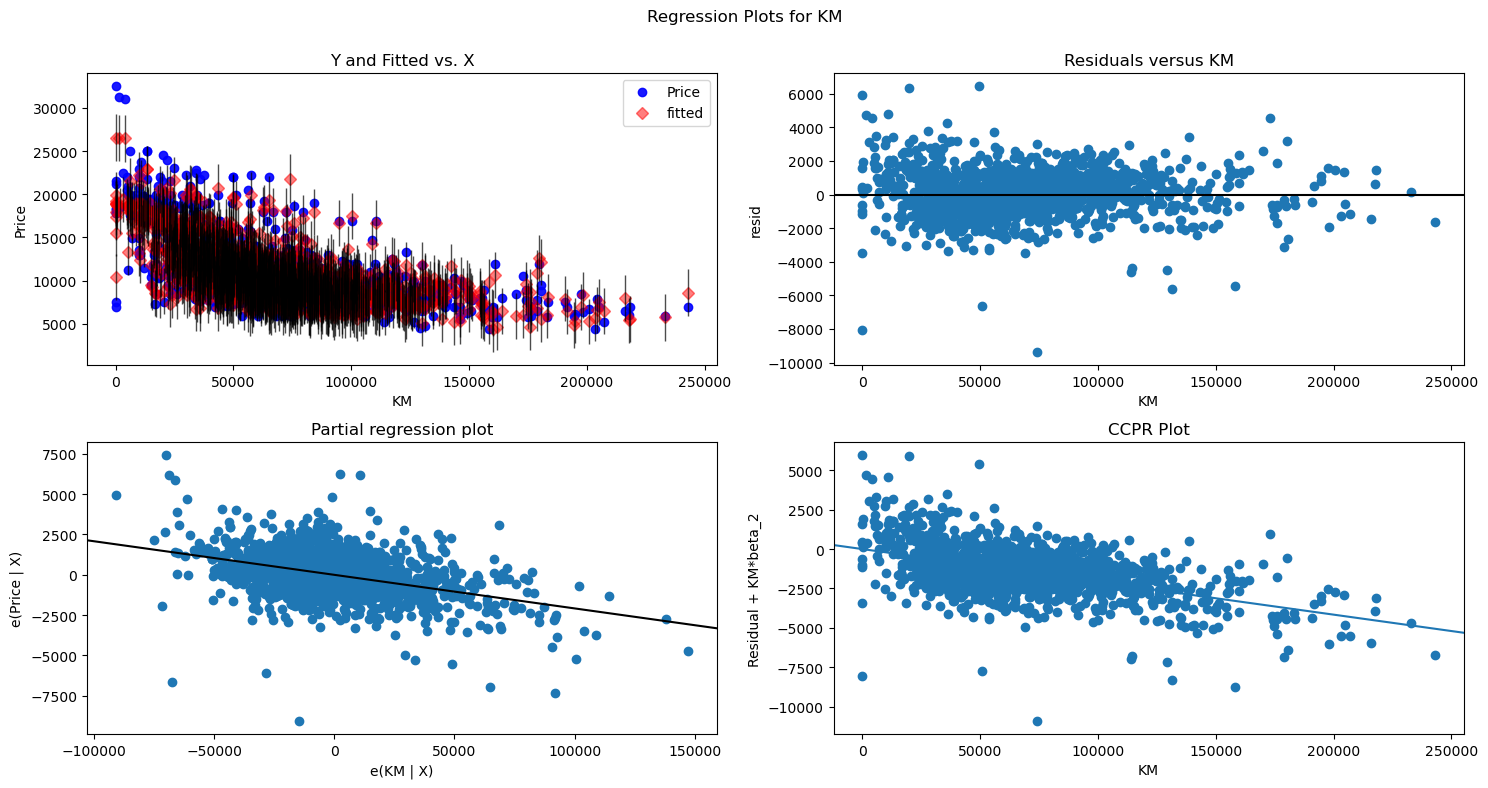

In [72]:
fig = plt.figure(figsize=(15,8))
fig = graphics.plot_regress_exog(model, "KM", fig=fig)
plt.show()

eval_env: 1


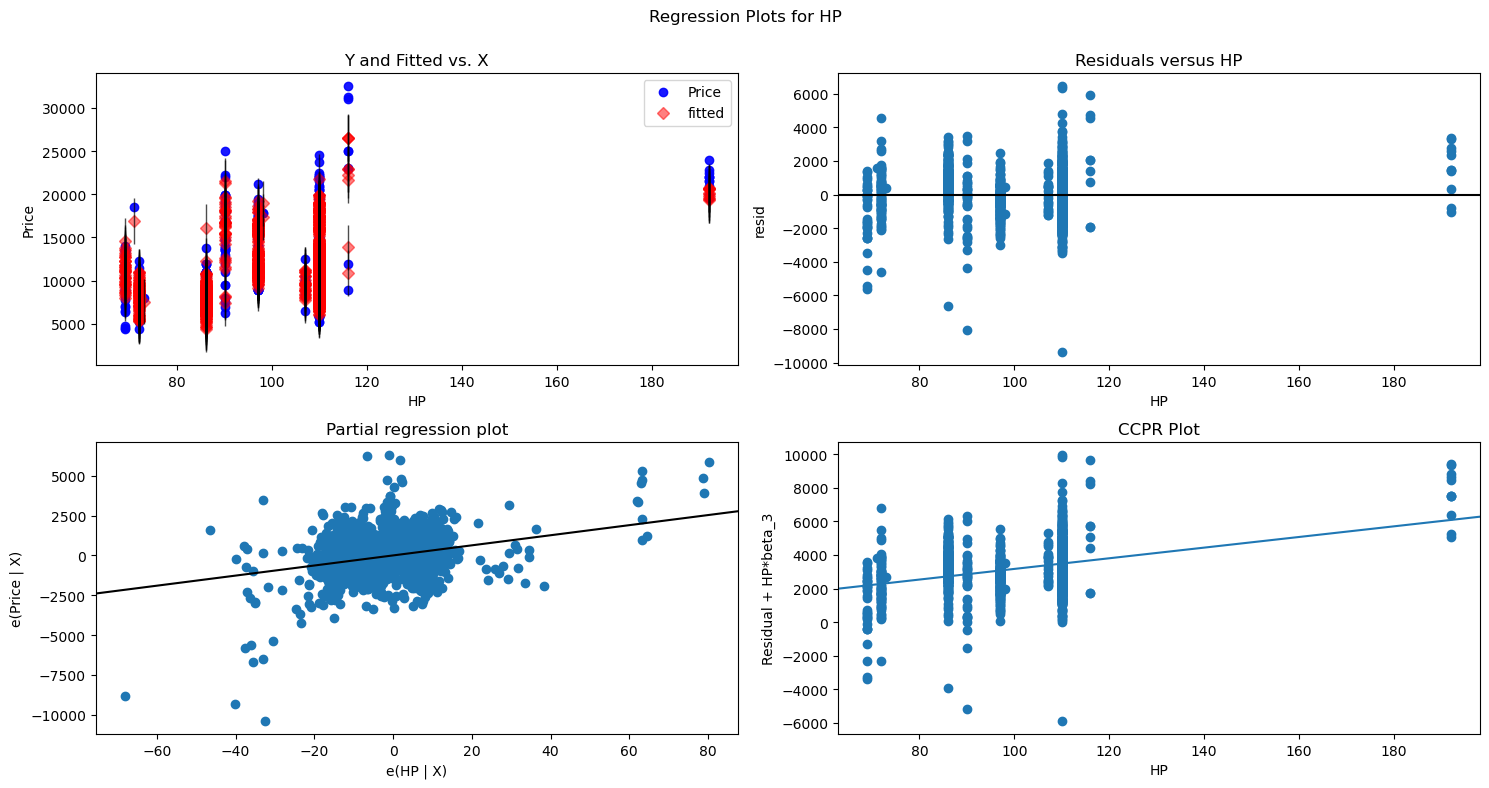

In [74]:
fig = plt.figure(figsize=(15,8))
fig = graphics.plot_regress_exog(model, "HP", fig=fig)
plt.show()

eval_env: 1


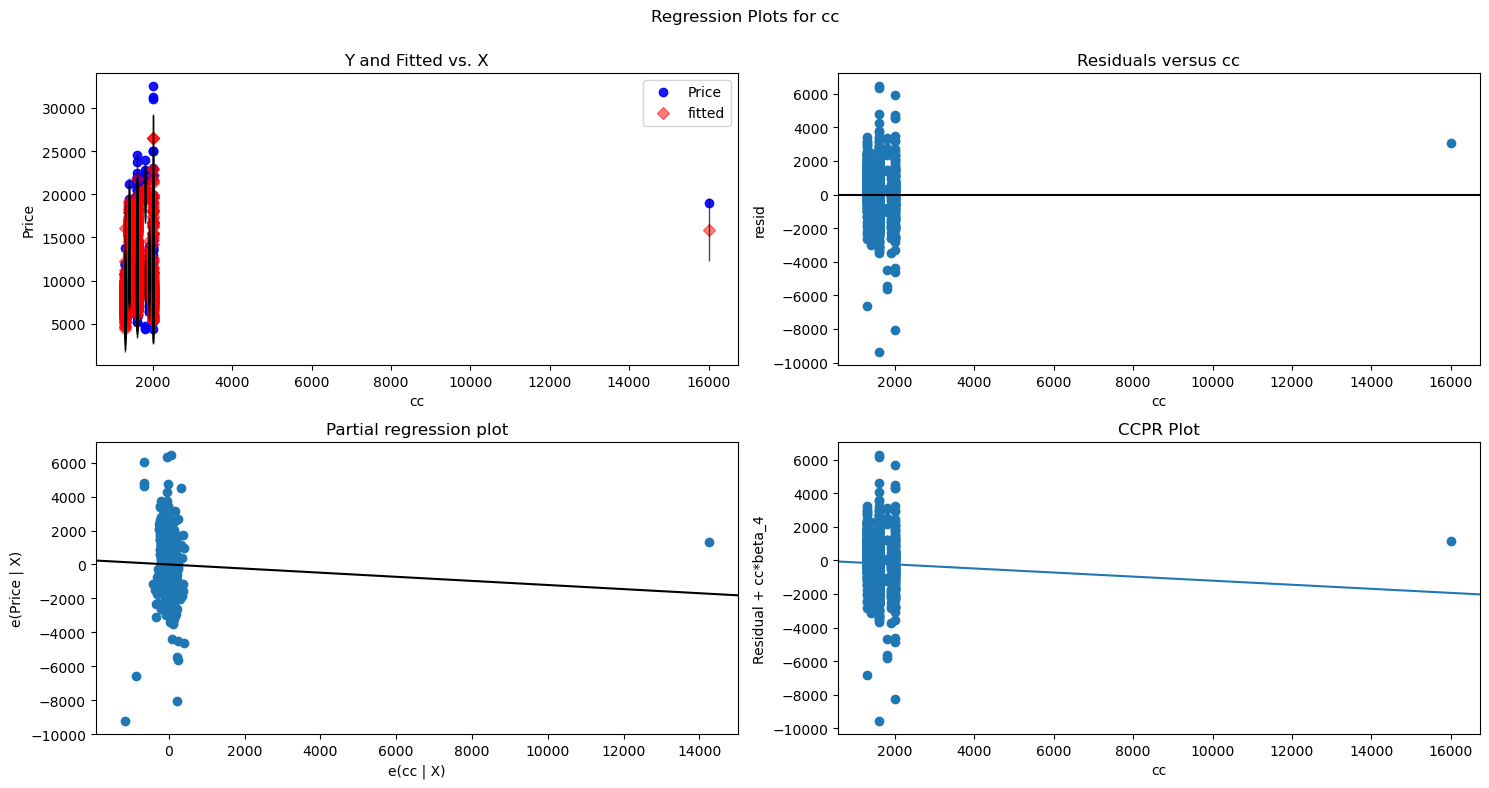

In [75]:
fig = plt.figure(figsize=(15,8))
fig = graphics.plot_regress_exog(model, "cc", fig=fig)
plt.show()

eval_env: 1


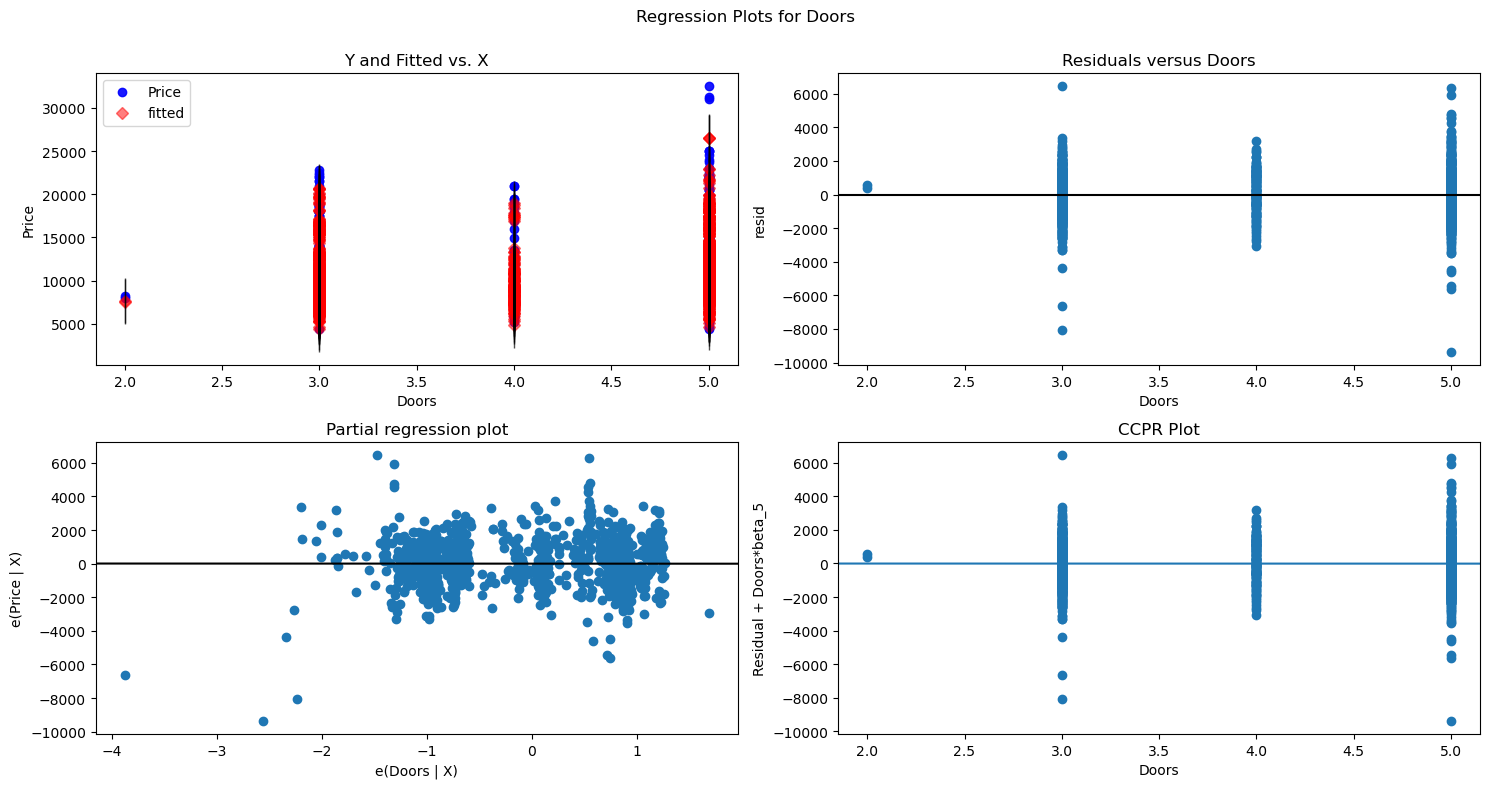

In [77]:
fig = plt.figure(figsize=(15,8))
fig = graphics.plot_regress_exog(model, "Doors", fig=fig)
plt.show()

eval_env: 1


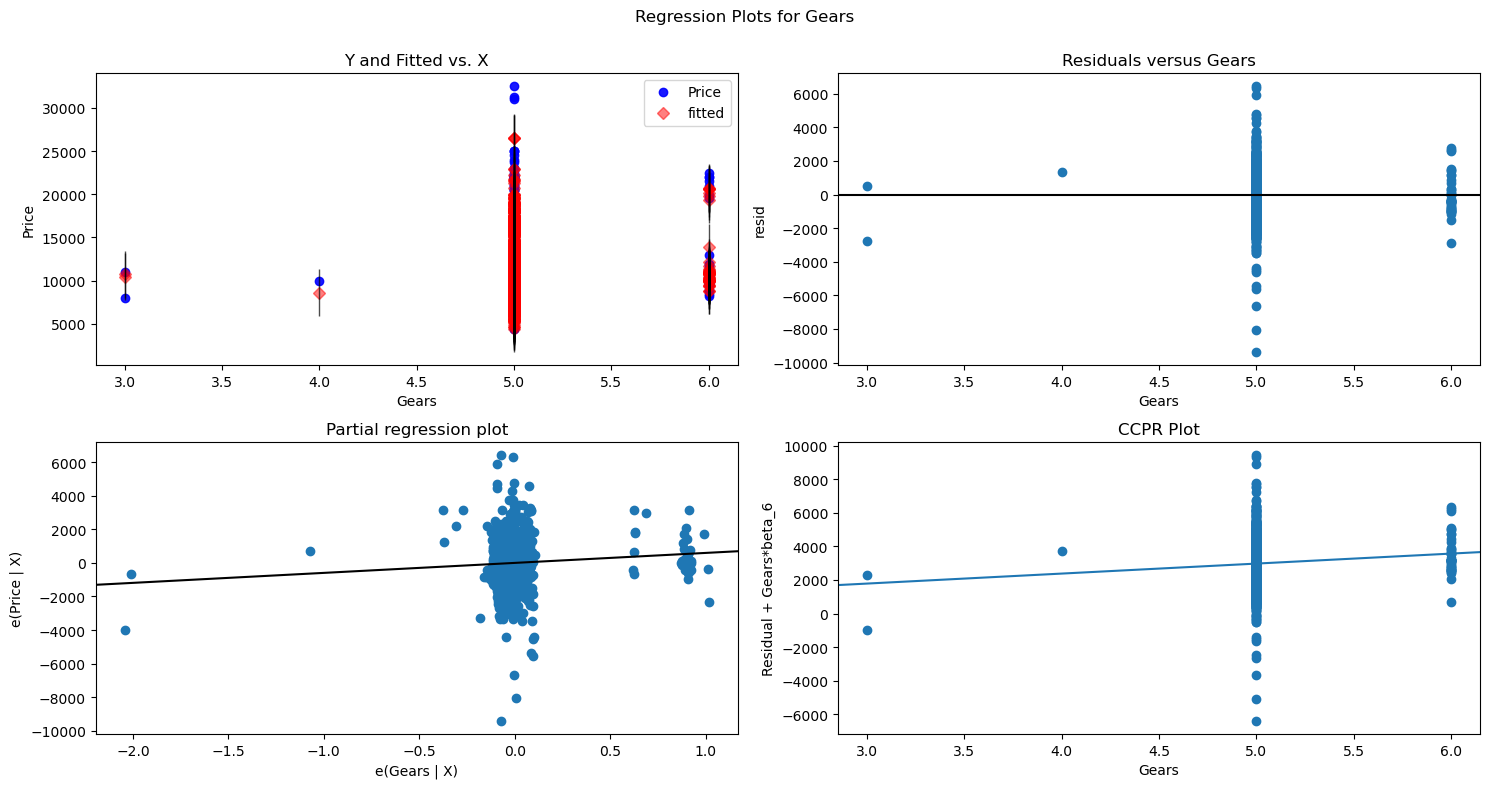

In [78]:
fig = plt.figure(figsize=(15,8))
fig = graphics.plot_regress_exog(model, "Gears", fig=fig)
plt.show()

eval_env: 1


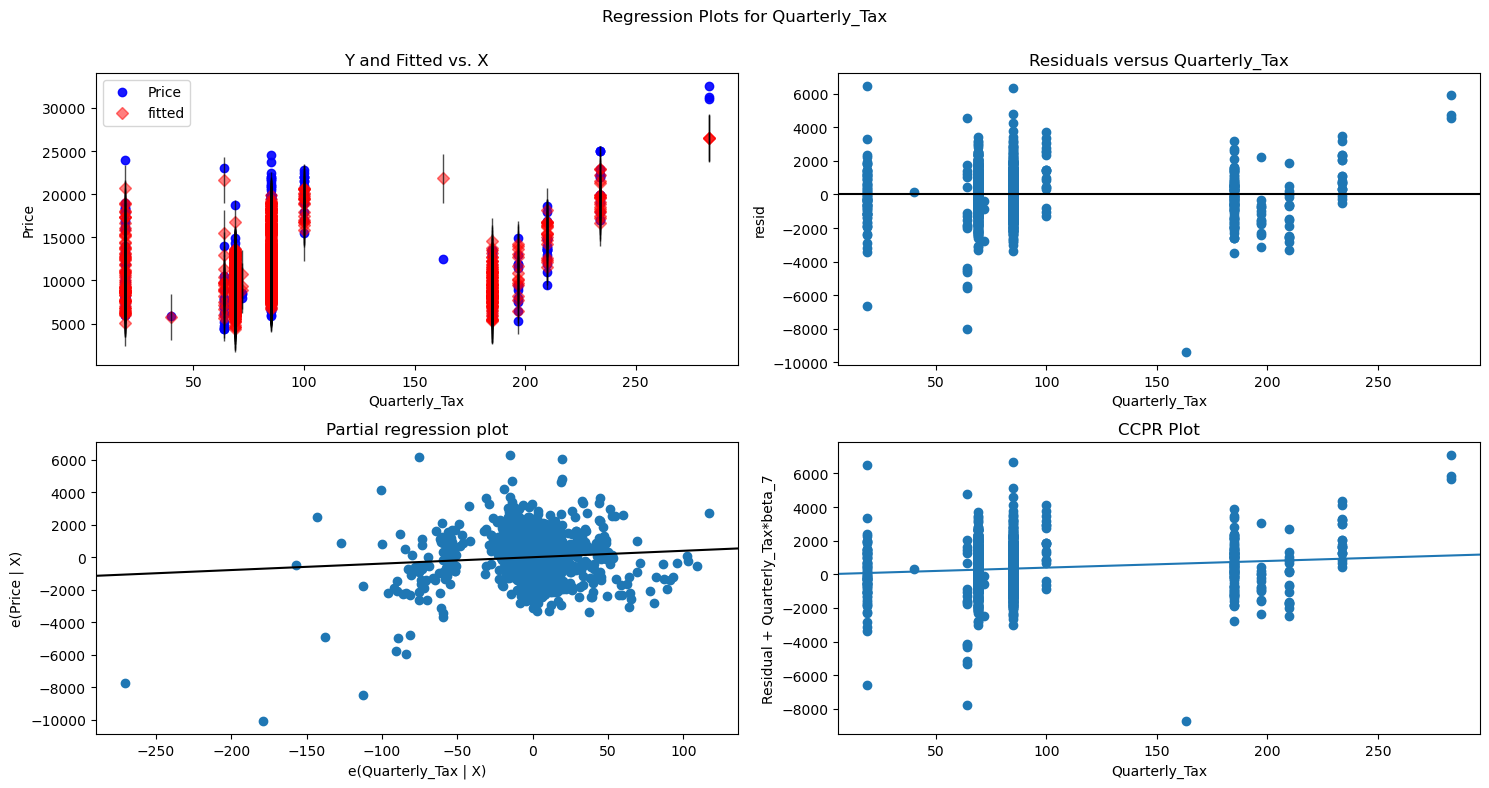

In [79]:
fig = plt.figure(figsize=(15,8))
fig = graphics.plot_regress_exog(model, "Quarterly_Tax", fig=fig)
plt.show()

eval_env: 1


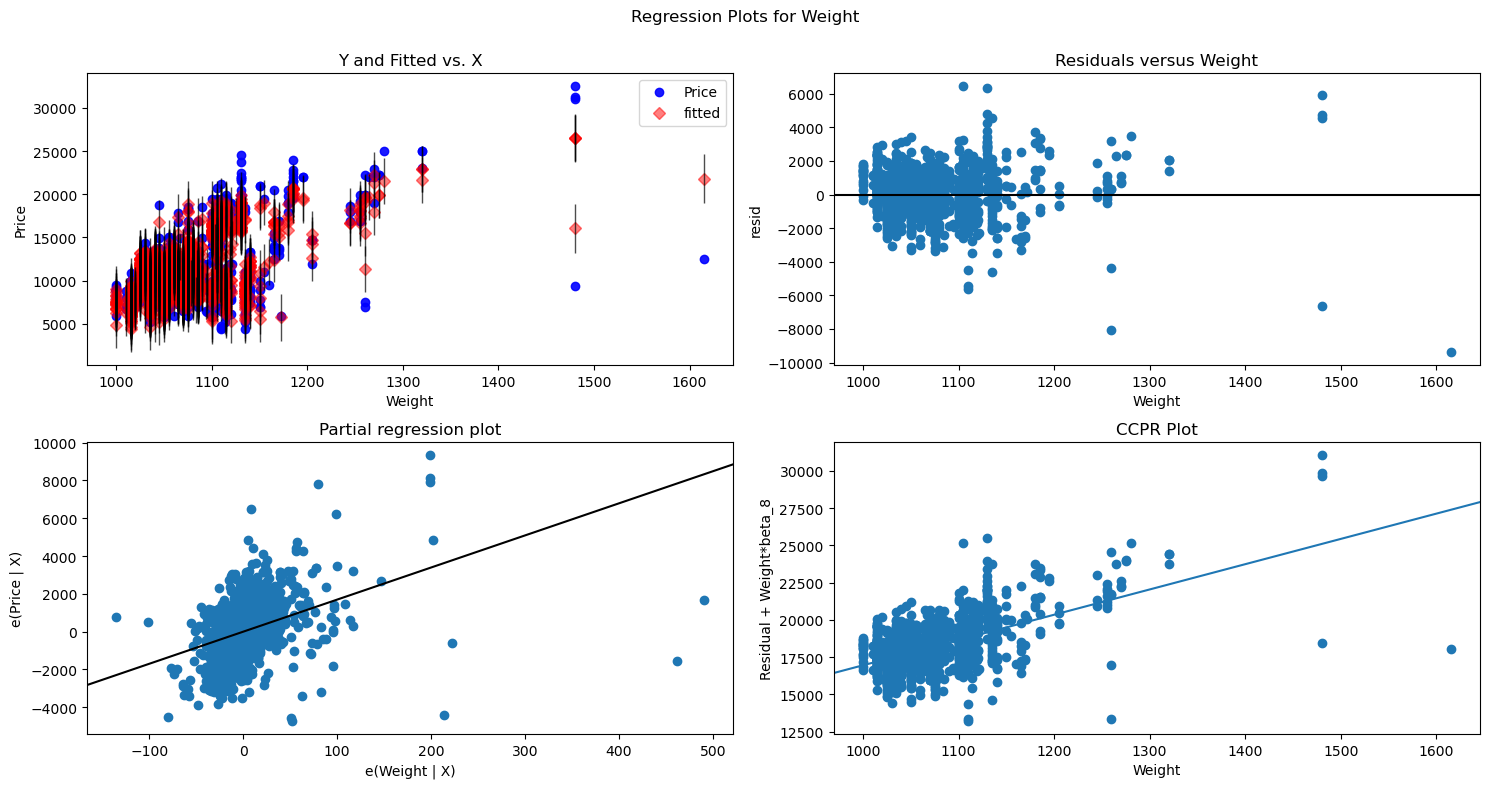

In [81]:
fig = plt.figure(figsize=(15,8))
fig = graphics.plot_regress_exog(model, "Weight", fig=fig)
plt.show()

# cooks distance

In [82]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

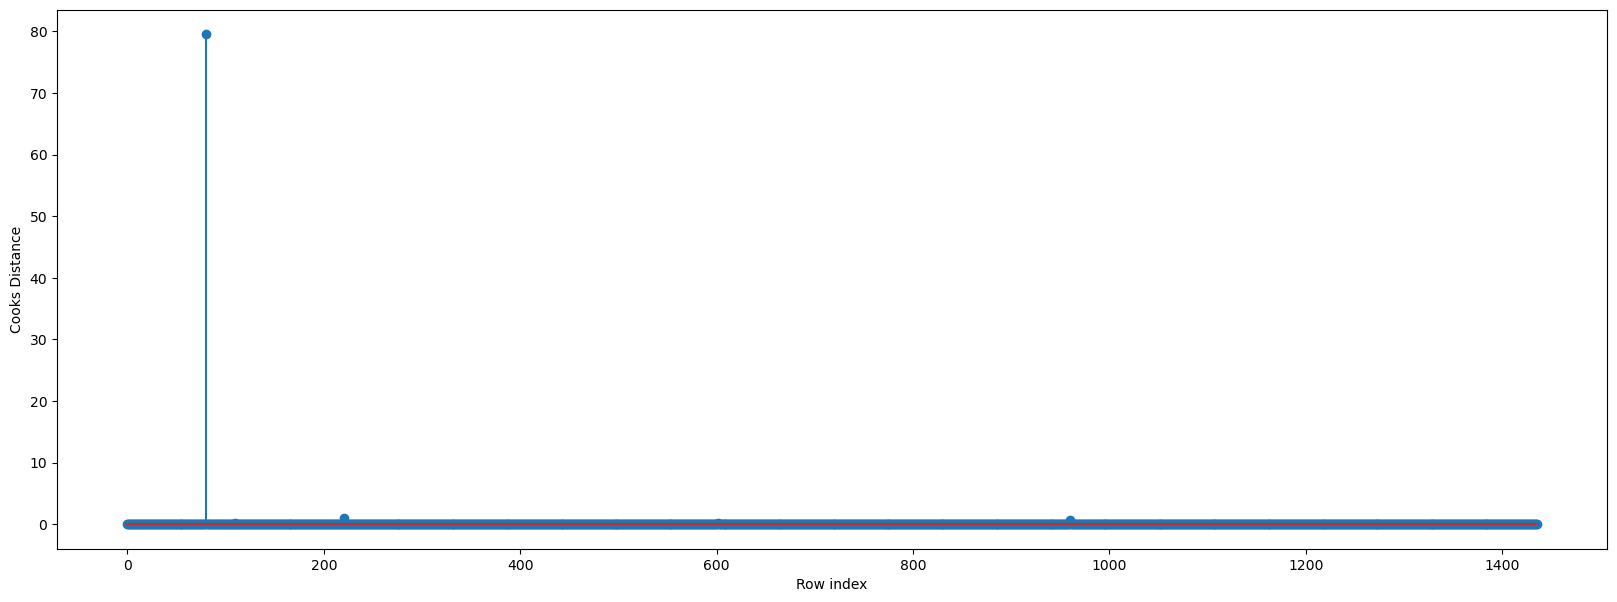

In [83]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [86]:
(np.argmax(c),np.max(c))

(80, 79.52010624138055)

# High influence points

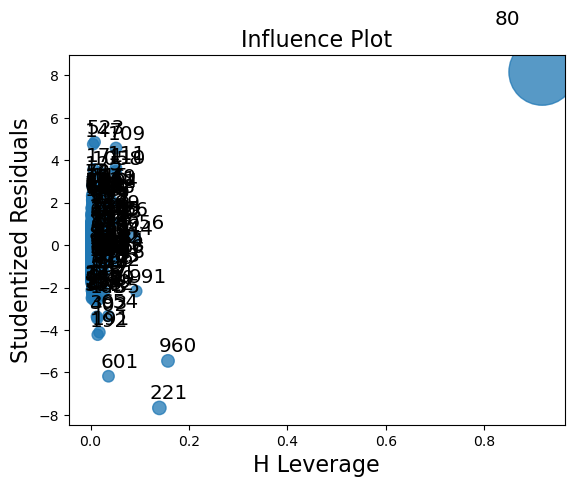

In [87]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [88]:
k =8
n = df.shape[0]
levarage_cutoff = 3*((k+1)/n)
levarage_cutoff

0.018802228412256268

In [90]:
df_new=df.drop(df.index[[80,199,192,221,393,402,601,960,109,110,111,125,147,171,523,1058]],axis=0).reset_index()
df_new

,index,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,0,13500,23,46986,90,2000,3,5,210,1165
1,1,13750,23,72937,90,2000,3,5,210,1165
2,2,13950,24,41711,90,2000,3,5,210,1165
3,3,14950,26,48000,90,2000,3,5,210,1165
4,4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...,...
1415,1431,7500,69,20544,86,1300,3,5,69,1025
1416,1432,10845,72,19000,86,1300,3,5,69,1015
1417,1433,8500,71,17016,86,1300,3,5,69,1015
1418,1434,7250,70,16916,86,1300,3,5,69,1015


In [91]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1420 entries, 0 to 1419
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   index          1420 non-null   int64
 1   Price          1420 non-null   int64
 2   Age_08_04      1420 non-null   int64
 3   KM             1420 non-null   int64
 4   HP             1420 non-null   int64
 5   cc             1420 non-null   int64
 6   Doors          1420 non-null   int64
 7   Gears          1420 non-null   int64
 8   Quarterly_Tax  1420 non-null   int64
 9   Weight         1420 non-null   int64
dtypes: int64(10)
memory usage: 111.1 KB


# build model

In [93]:
model_new = smf.ols('Price ~ Age_08_04 + KM + HP + cc + Doors + Gears + Quarterly_Tax + Weight',data = df_new).fit()
model_new

In [105]:
model_new.rsquared

0.8892409937336134

In [106]:
model_new.rsquared_adj

0.8886130192119046

In [107]:
#Thus, the rsquared value is increase and also rsuared_adj value also increase